In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [13]:
df = pd.read_csv('/content/drive/MyDrive/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [14]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [17]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42) # Add parameters to the model!
model.fit(X_train,y_train) # Complete this method call!

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

Accuracy: 0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.71      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.81      0.53      0.53      3652
weighted avg       0.89      0.90      0.86      3652


Confusion Matrix:

[[3278    8]
 [ 346   20]]


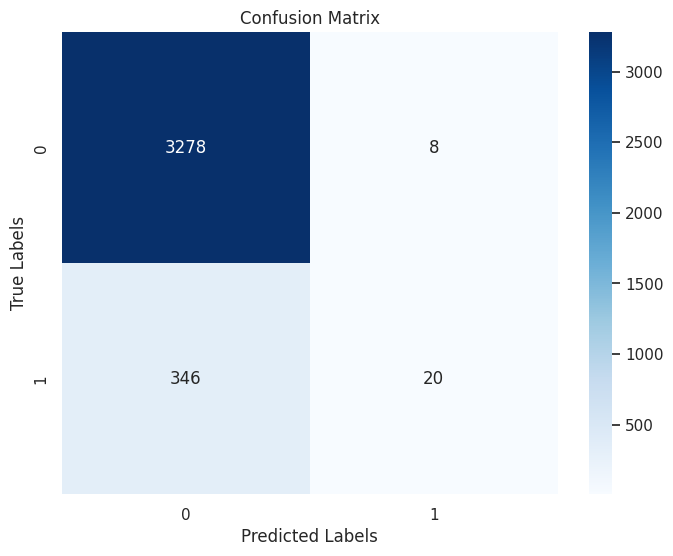

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Why were the specific parameters chosen for the Random Forest model, and what is their expected impact on performance?

1. **`n_estimators=100`**:
   - Specifies the number of decision trees in the forest.
   - A higher number generally increases model stability and reduces variance but also increases computation time.
   - `100` is a balanced choice, ensuring robust predictions while keeping training time manageable.

2. **`max_depth=None`**:
   - Allows each tree to grow until all leaves are pure or contain fewer than the minimum samples required for splitting.
   - Ensures the model captures complex patterns in the data but risks overfitting, which can be mitigated with other parameters (e.g., pruning or `min_samples_split`).

3. **`random_state=42`**:
   - Ensures reproducibility of results by fixing the random seed.
   - Essential for consistent model performance during experiments.

### Do you think the model performance is satisfactory? Justify your answer.

- **Evaluation Metrics**:
  - **Accuracy**: Provides a good starting point, but it’s not sufficient alone, especially in imbalanced datasets.
  - **Precision, Recall, and F1-score**: Highlight how well the model performs for each class, considering false positives and false negatives.
  - **Confusion Matrix**: Offers detailed insights into classification errors.

- **Satisfaction Justification**:
  - If accuracy and F1-scores are high across all classes, the model's performance is satisfactory.
  - If the confusion matrix shows a bias (e.g., misclassification in minority classes), this suggests the need for further optimization, such as hyperparameter tuning, class balancing, or different models.
  - A satisfactory performance depends on whether the evaluation metrics align with the project's objectives (e.g., minimizing churn misclassification).

Would you like to discuss potential improvements or alternative approaches to enhance the model's performance?